In [1]:
import json, numpy as np, os, matplotlib.pyplot as plt

In [9]:
attack = "TS2Vec"
model = "lstm"
individuals = 32

path = os.path.join("data", model, "lira_" + attack, "data.json")
j = json.load(open(path))

samples_per_individual = len(j["audit_indices"]) // individuals

signals = np.array(j["signal_values"])[:, 0]
labels = np.array(j["true_labels"])

print(max(signals))
#signals = np.exp(signals)


signals_reshaped = signals.reshape(individuals, samples_per_individual)

indiv_mean = np.mean(signals_reshaped, axis=1)
indiv_median = np.median(signals_reshaped, axis=1)

q1 = np.quantile(signals_reshaped, 0.25, axis=1, keepdims=True)
q3 = np.quantile(signals_reshaped, 0.75, axis=1, keepdims=True)
outside_q = (signals_reshaped < q1) | (signals_reshaped > q3)
indiv_outside = np.mean(signals_reshaped, axis=1, where=outside_q)

indiv_labels = labels[::samples_per_individual]

for name, indiv_signals in [("median", indiv_median), ("mean", indiv_mean), ("outside", indiv_outside)]:
    korv = np.min(indiv_signals[individuals//2:])
    indiv_pred = np.array(indiv_signals < korv, dtype=int)
    tpr = np.sum(indiv_pred[:individuals//2]) / (individuals//2)

    print(name, "TPR@0%FPR:", tpr*100,"%")


indiv_signals = indiv_mean

korv = np.min(indiv_signals[individuals//2:])
indiv_pred = np.array(indiv_signals < korv, dtype=int)
tpr = np.sum(indiv_pred[:individuals//2]) / (individuals//2)

print("TPR@0%FPR:", tpr*100,"%")


805.4302320920178
median TPR@0%FPR: 6.25 %
mean TPR@0%FPR: 6.25 %
outside TPR@0%FPR: 12.5 %
TPR@0%FPR: 6.25 %


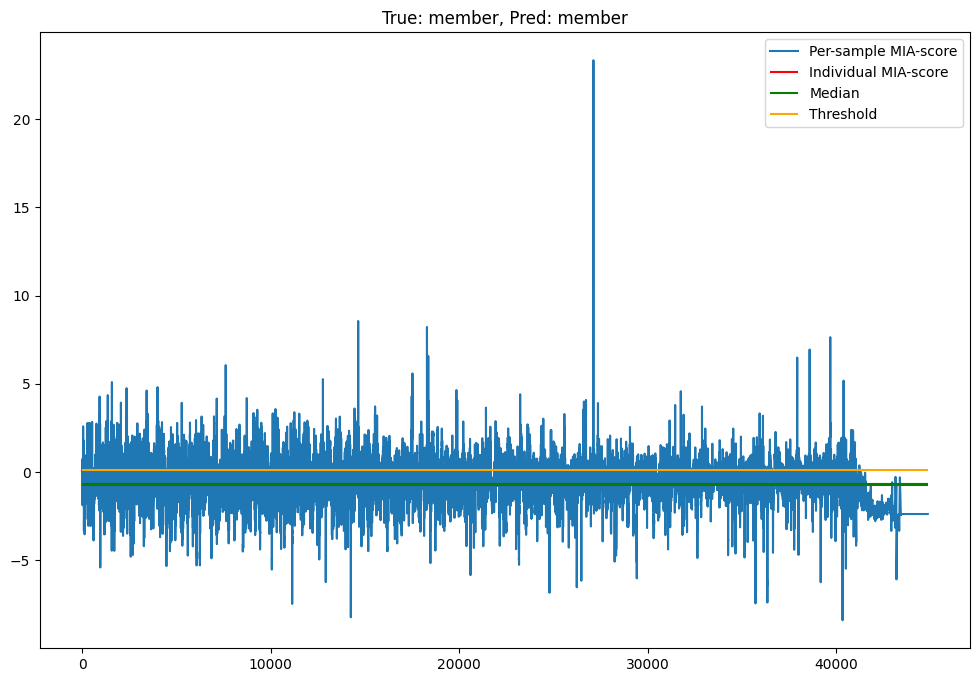

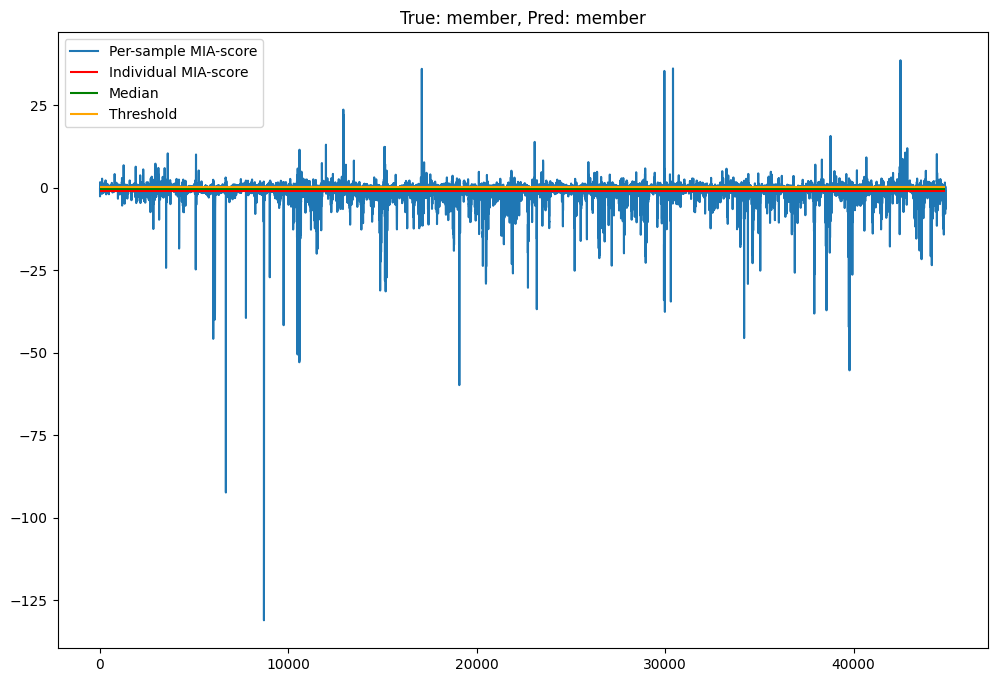

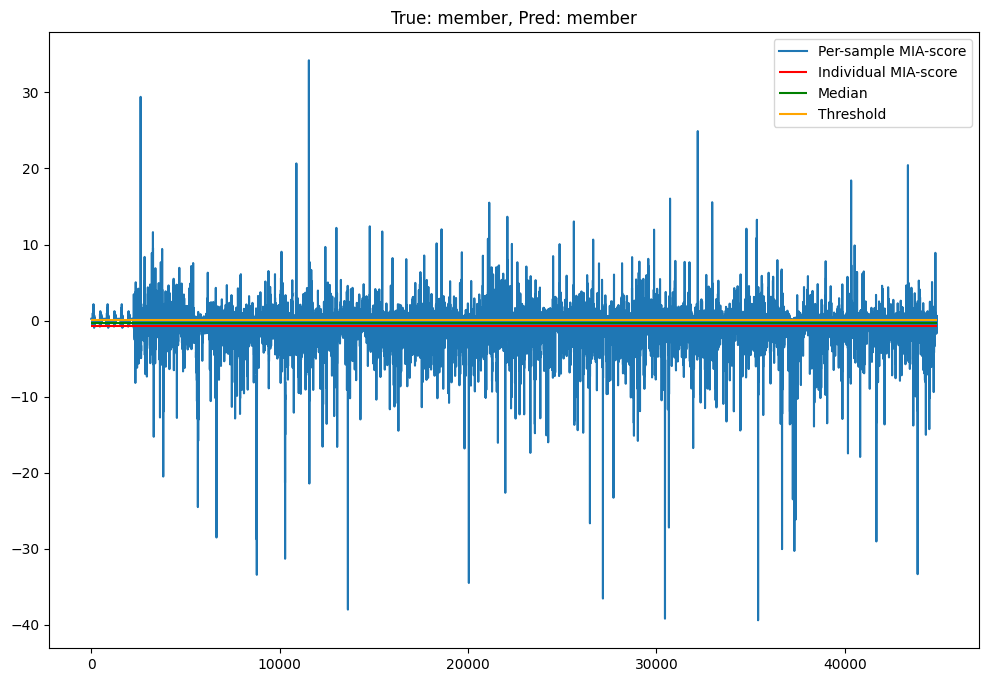

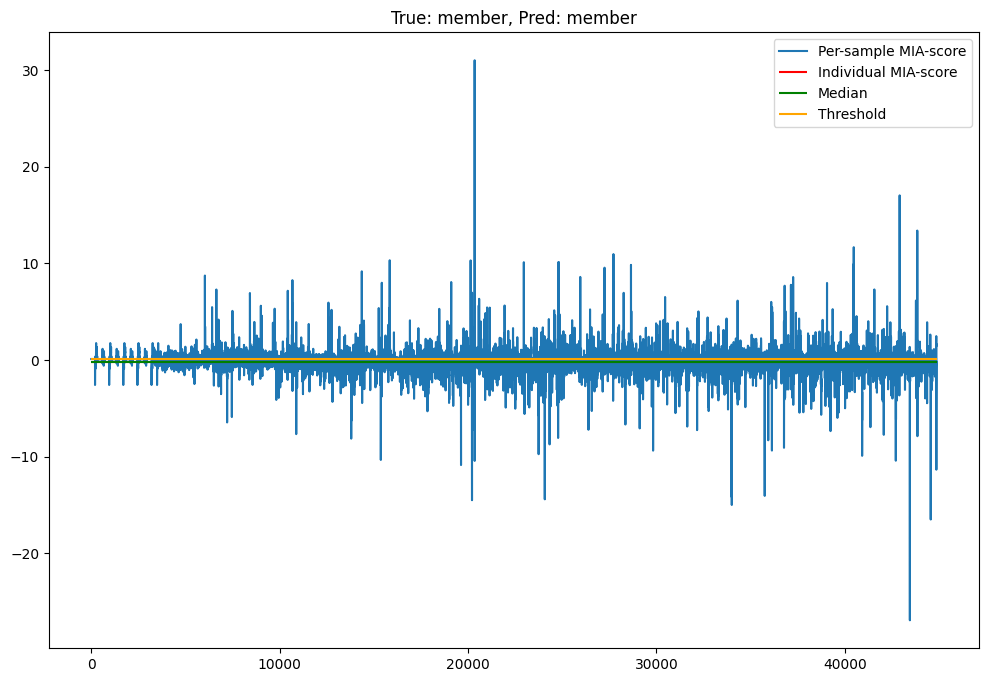

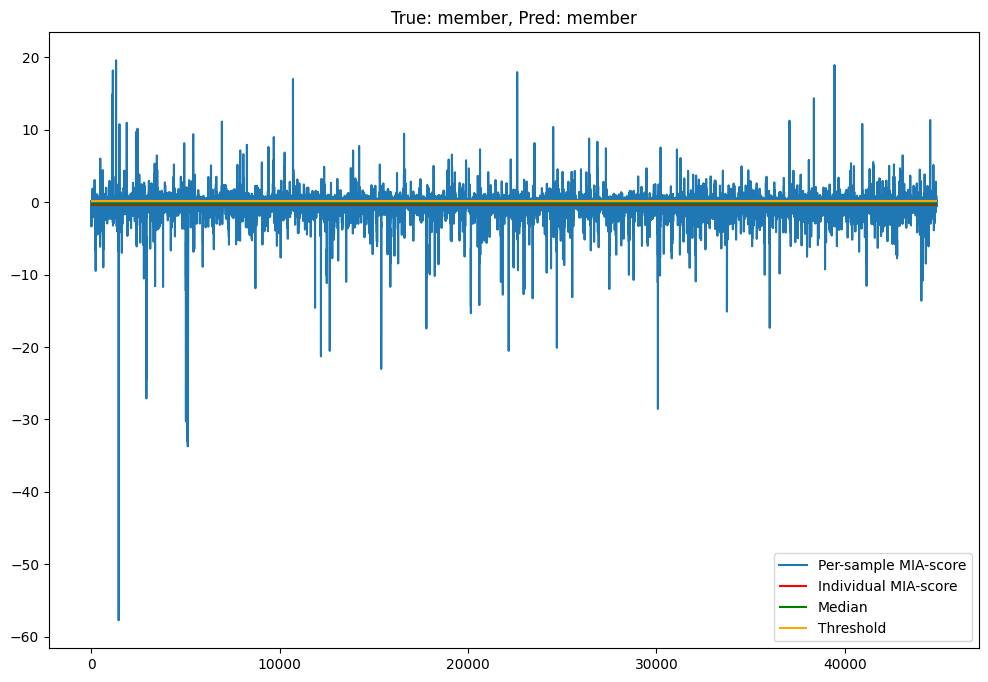

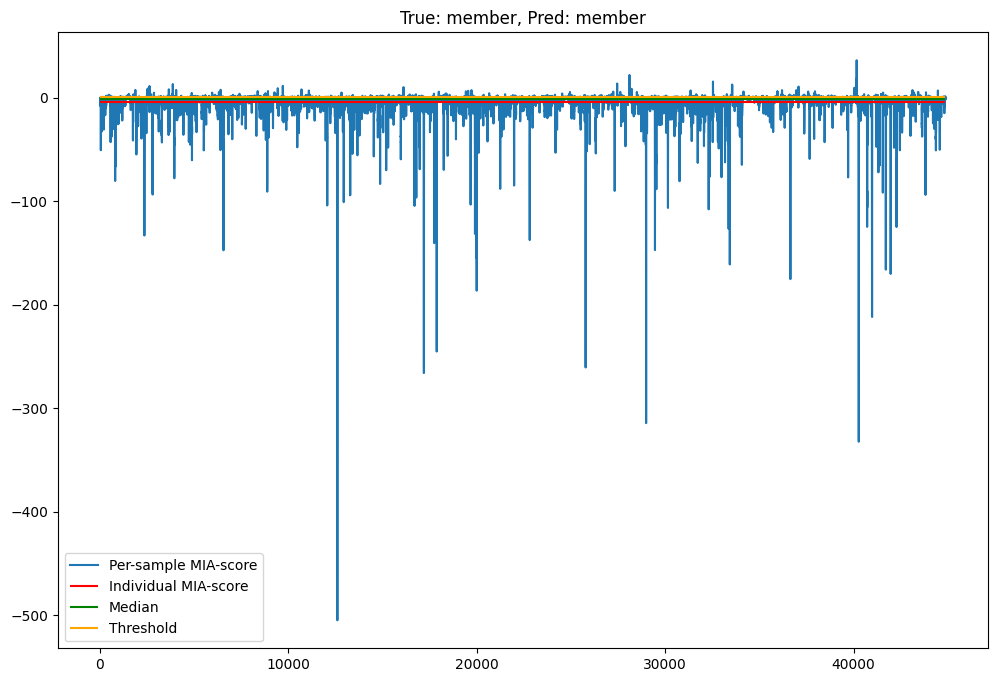

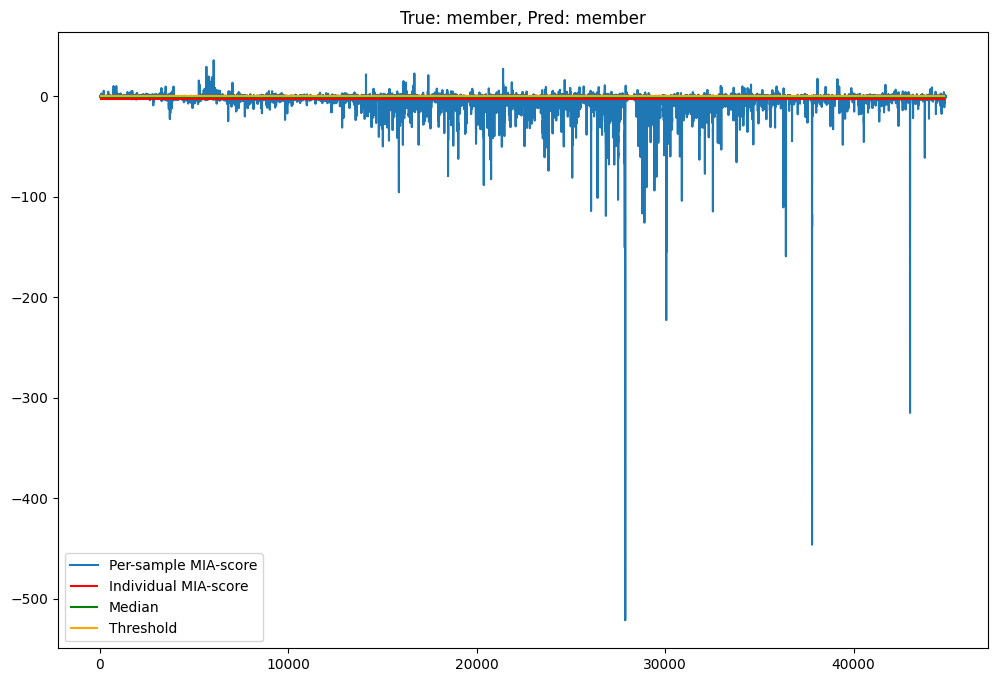

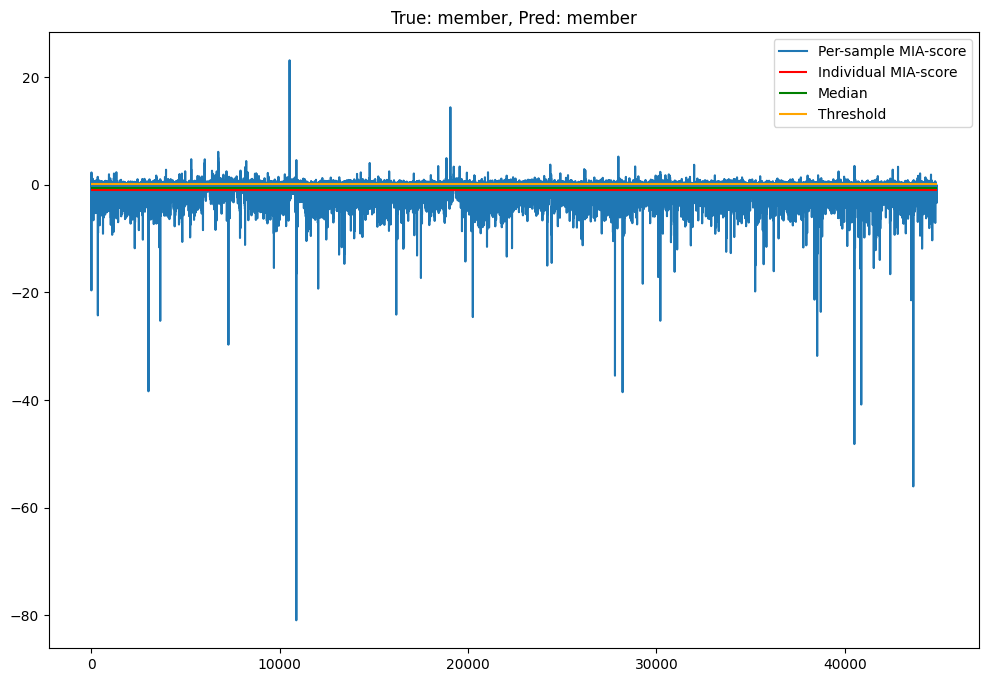

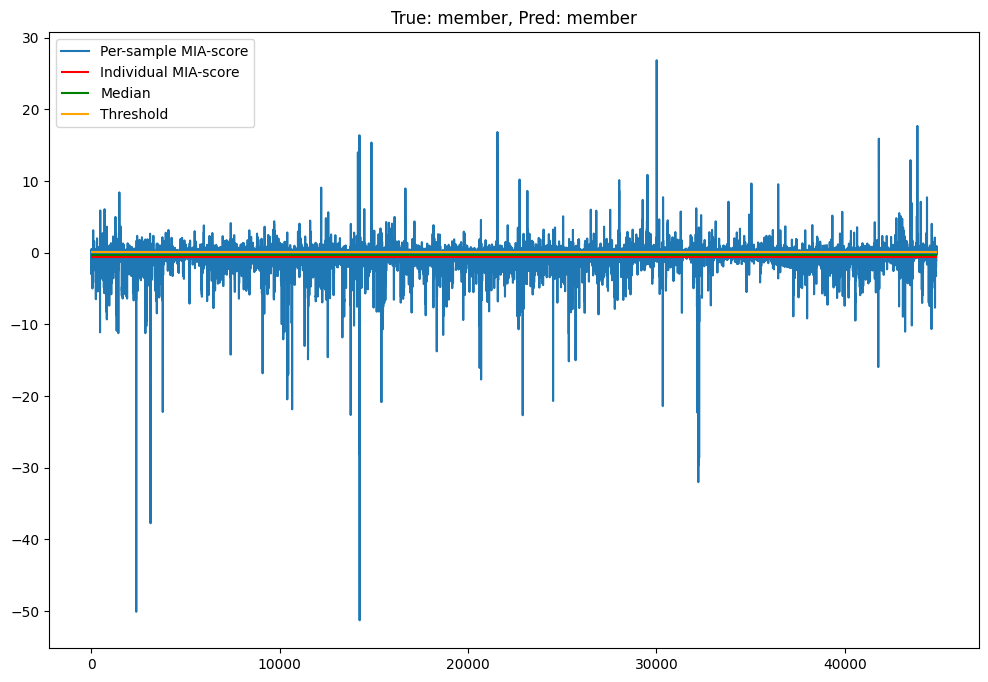

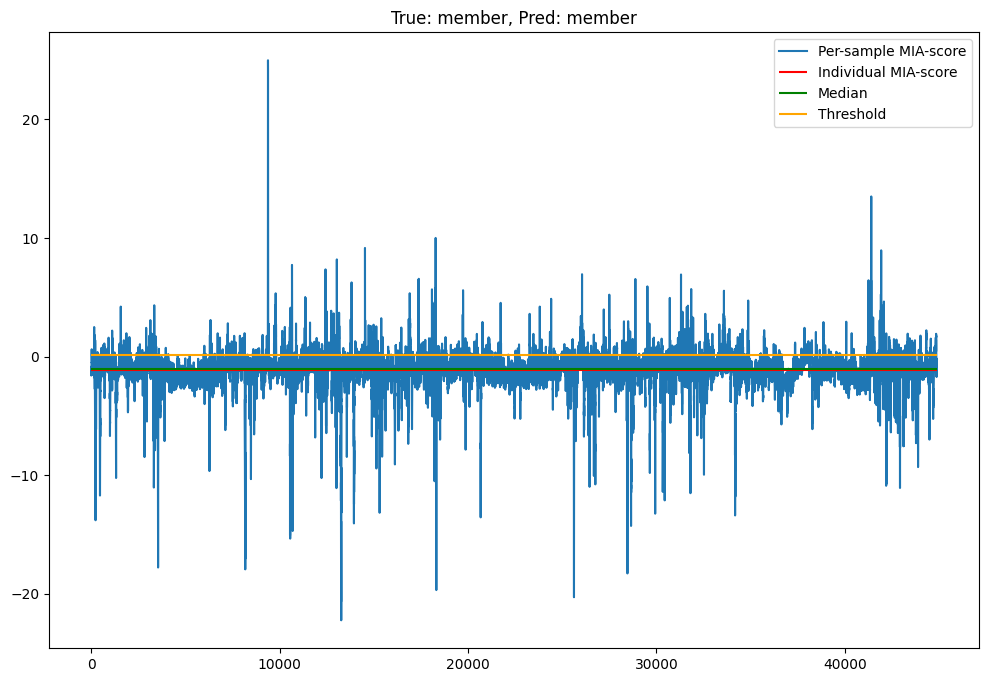

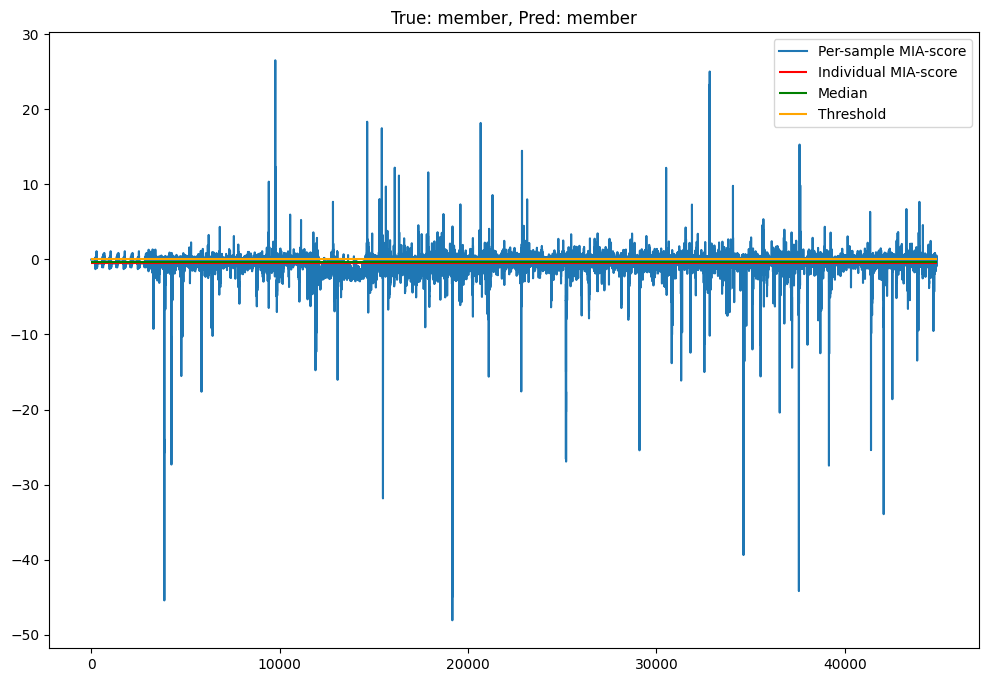

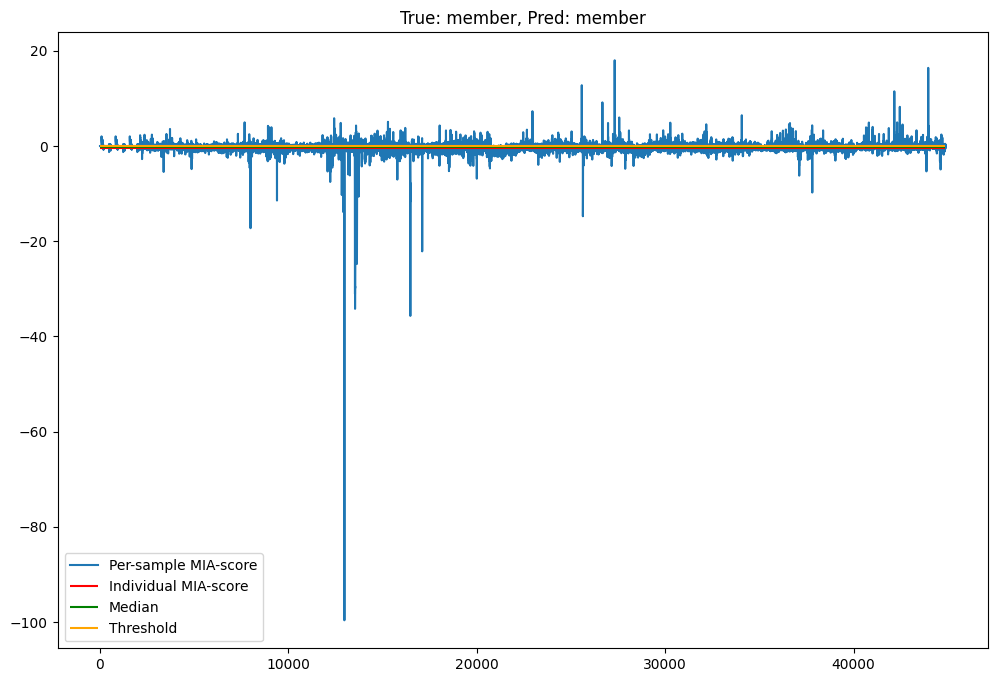

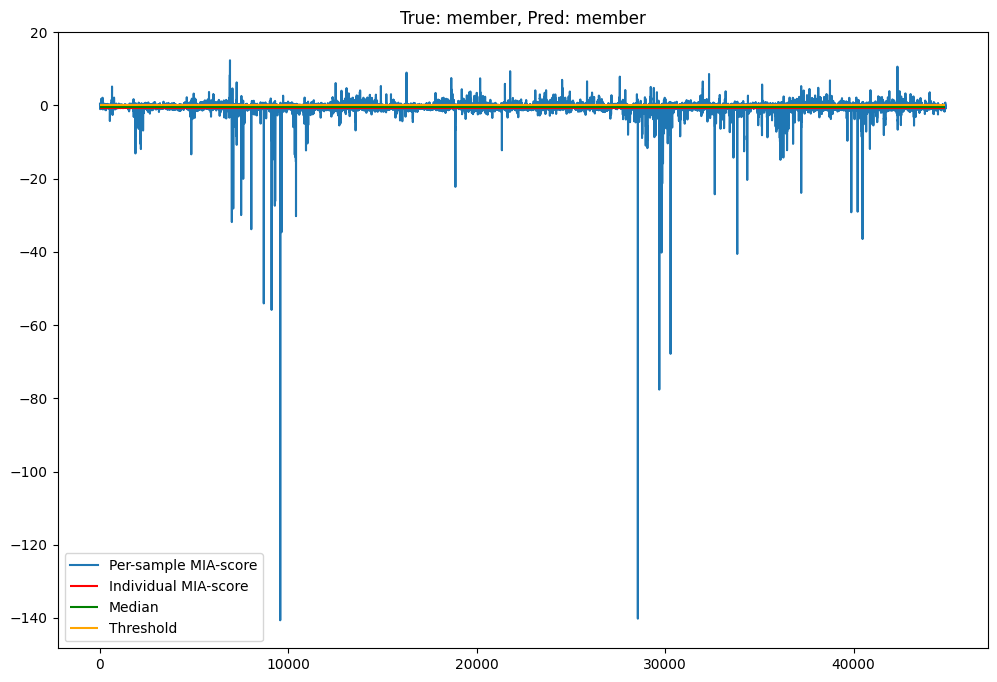

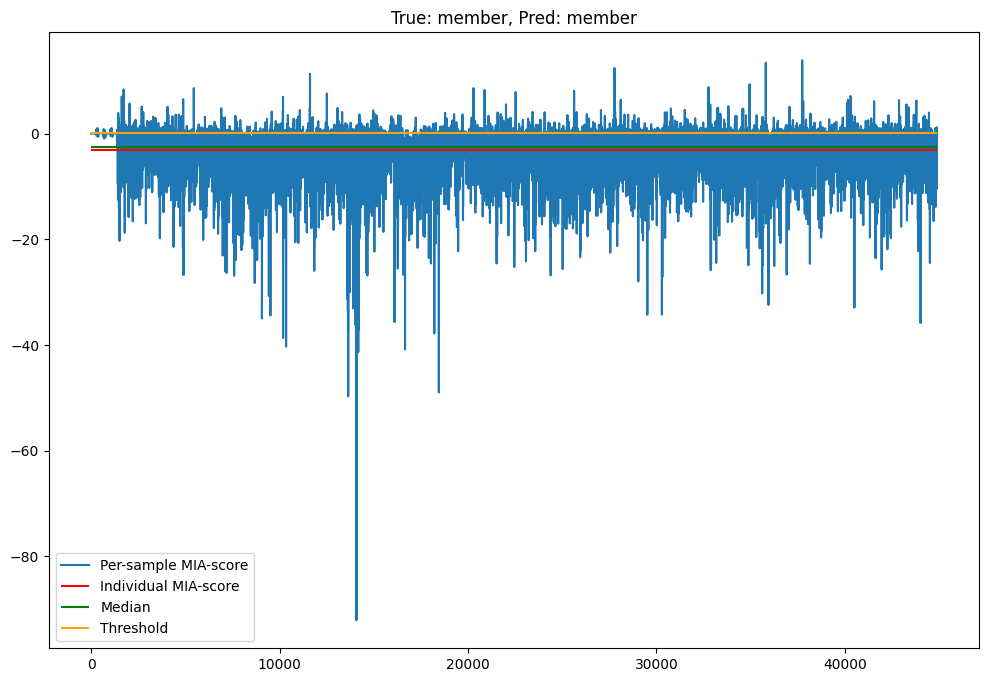

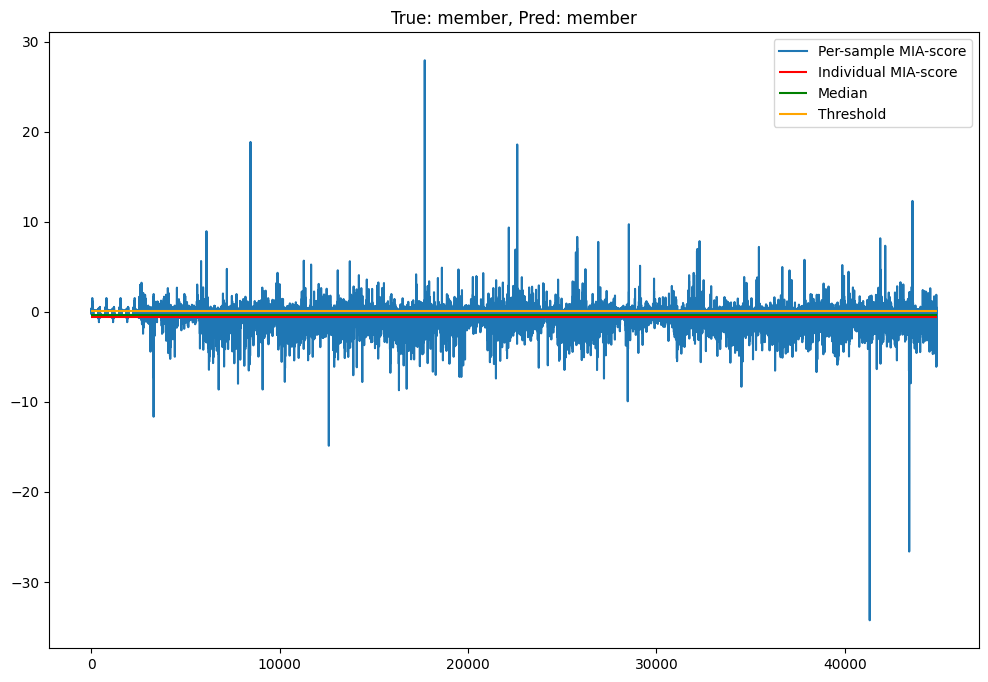

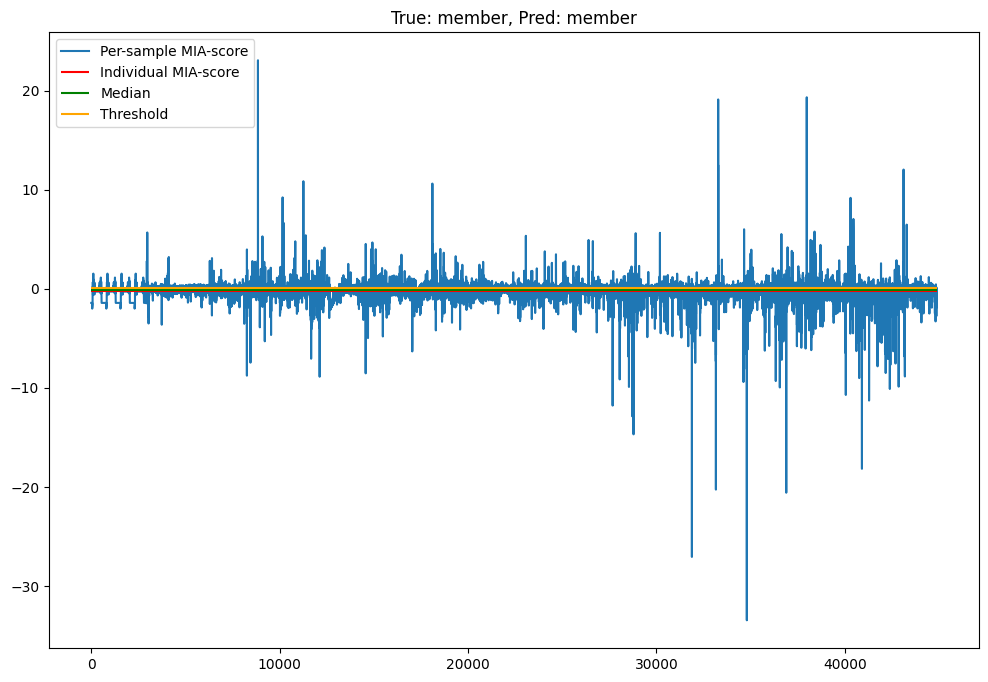

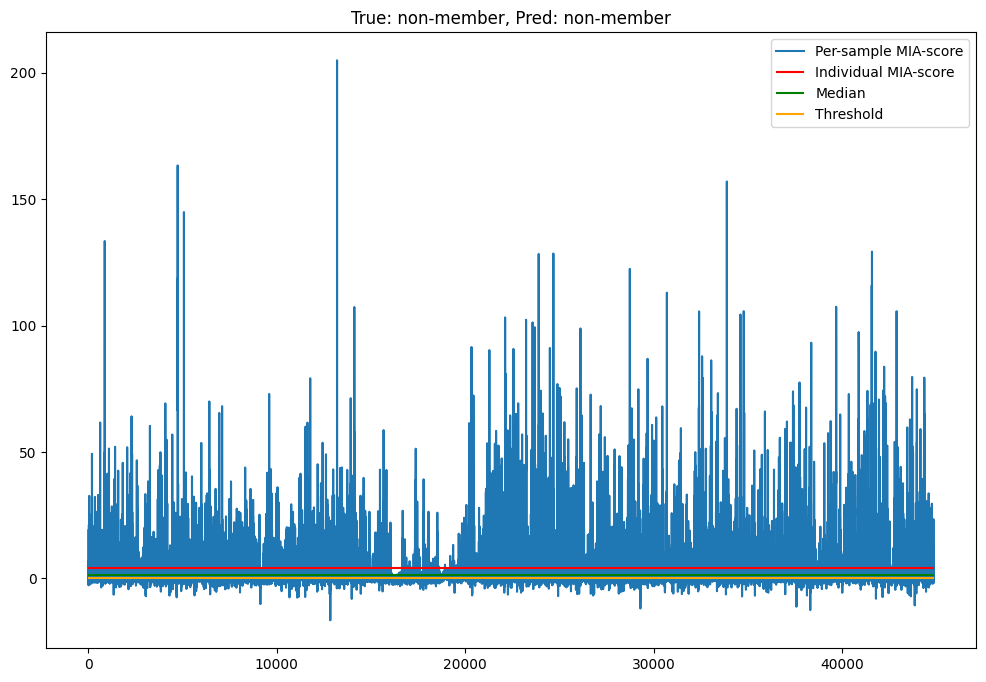

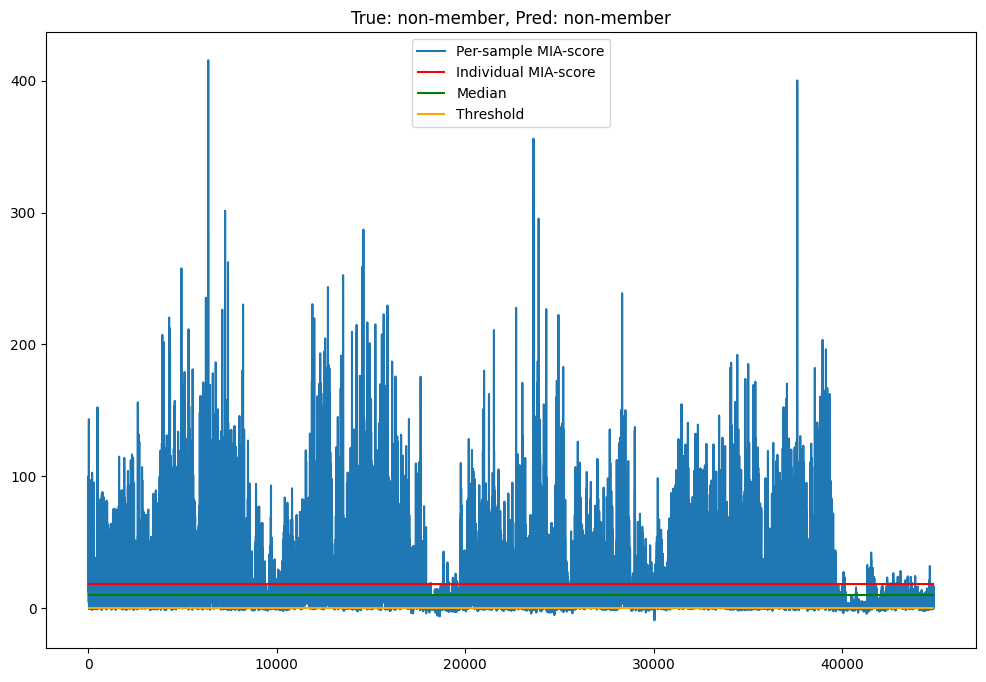

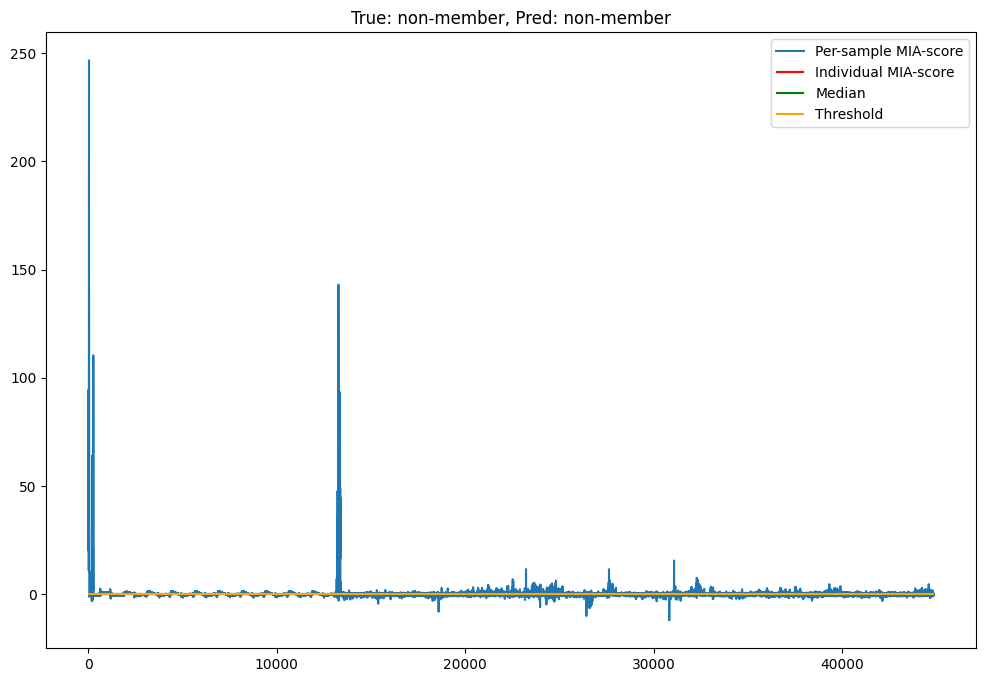

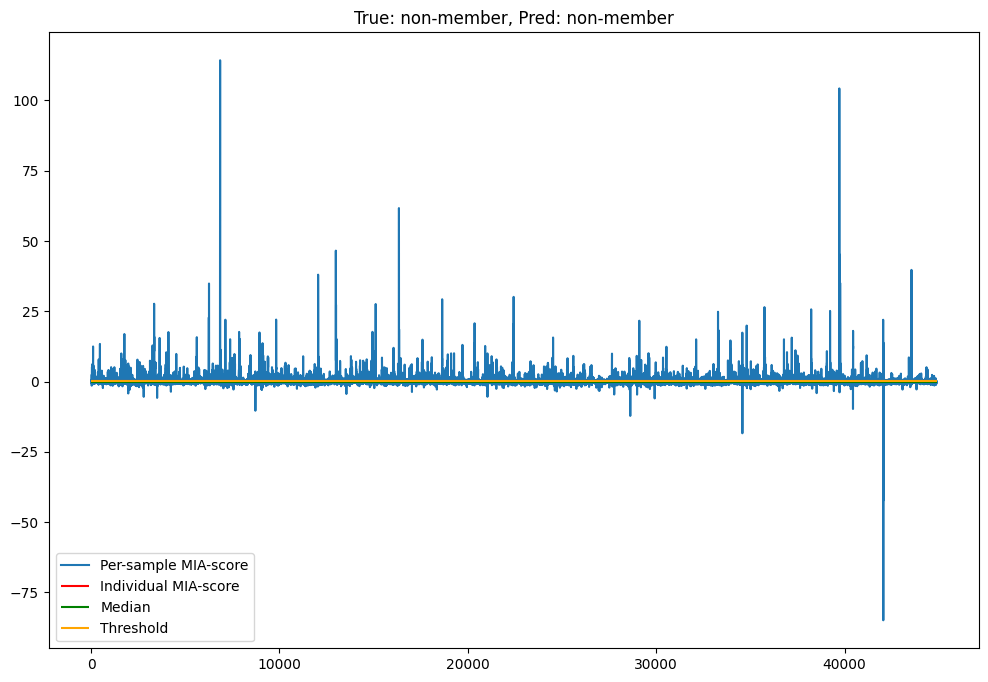

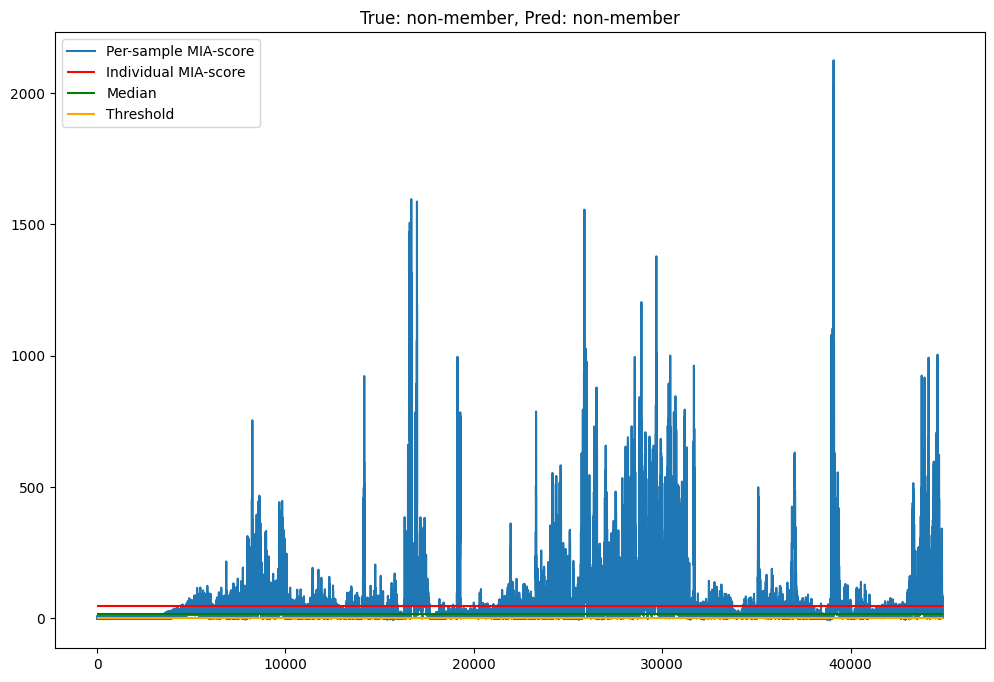

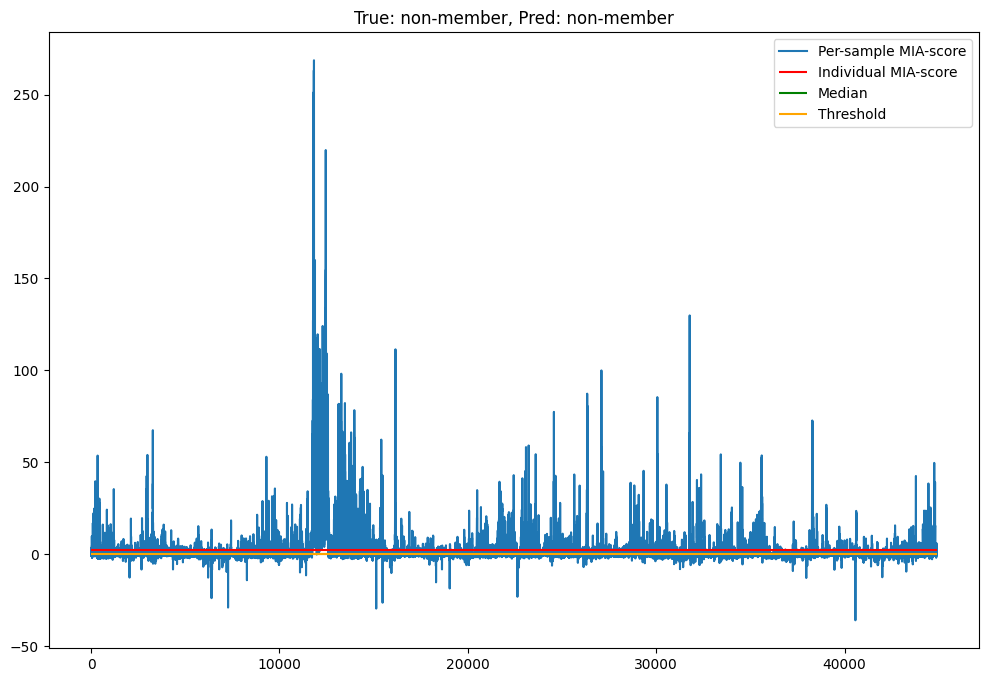

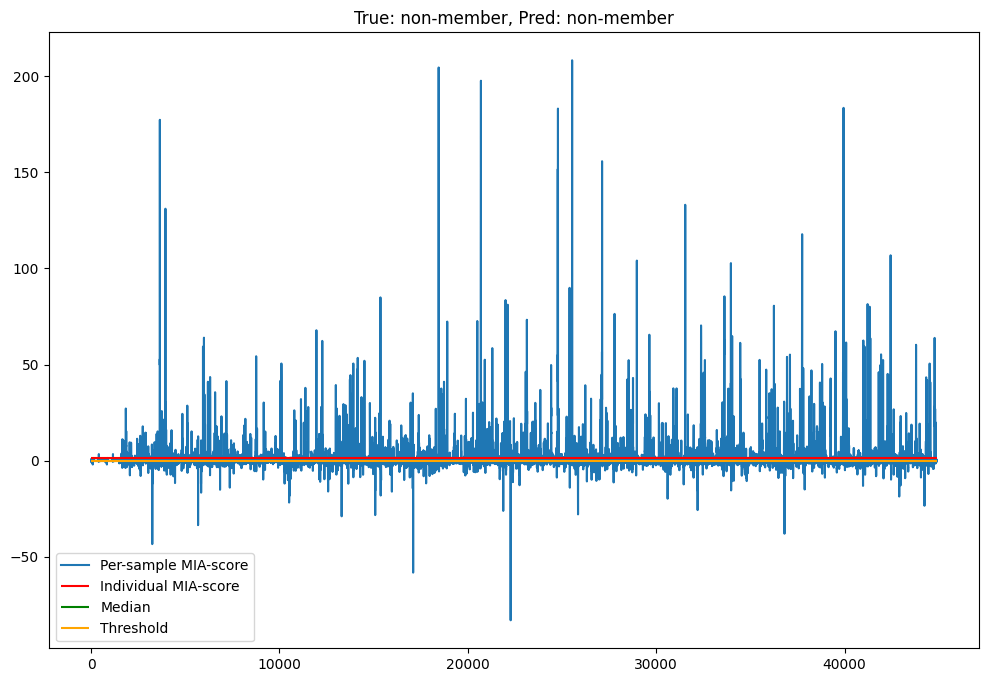

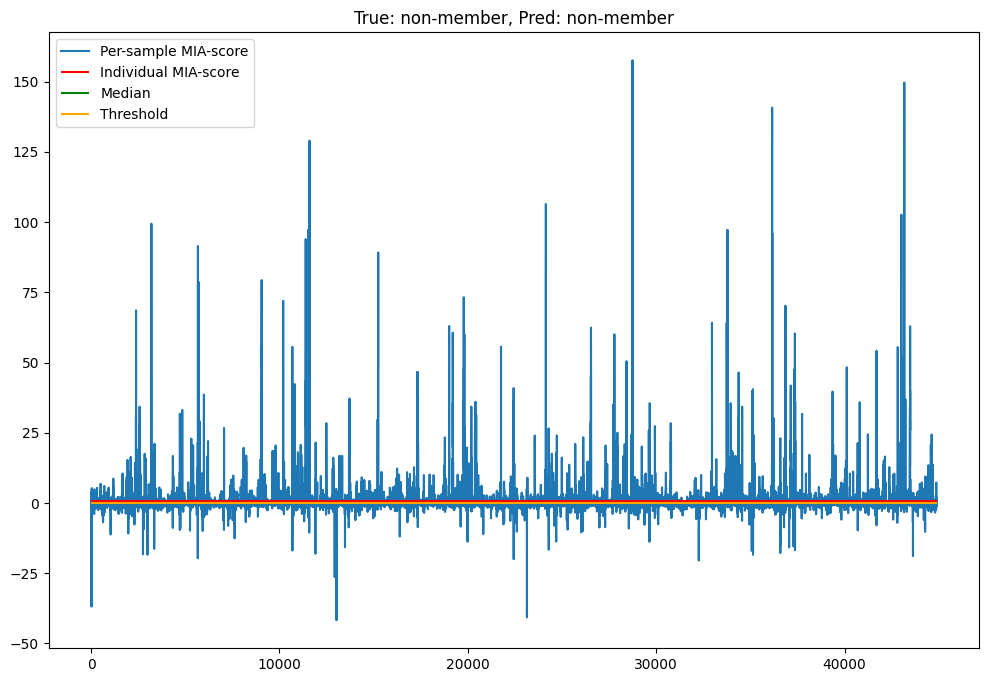

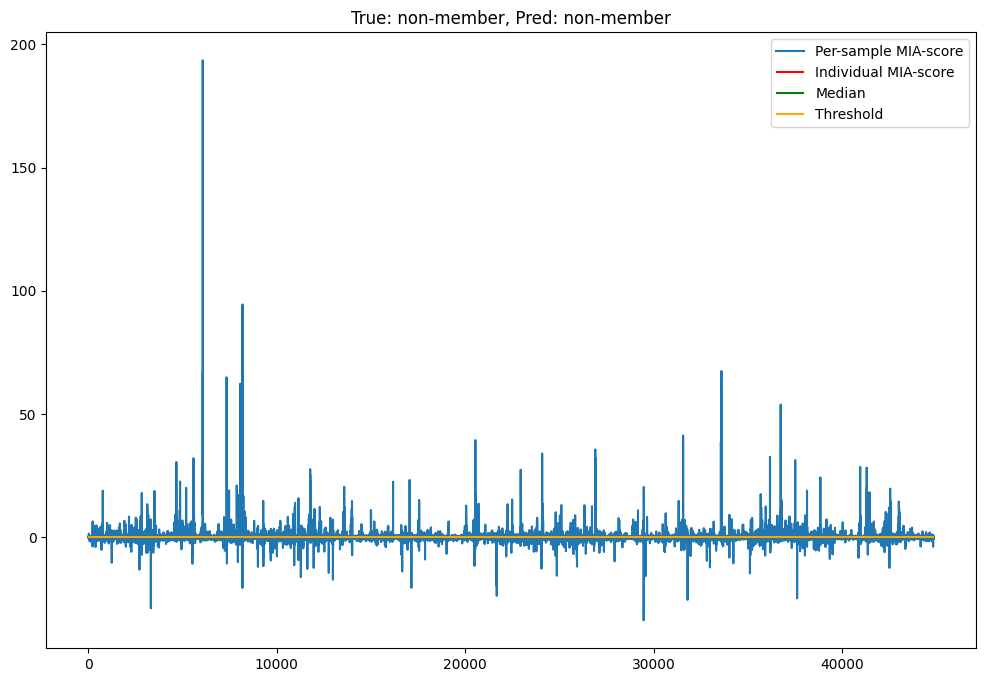

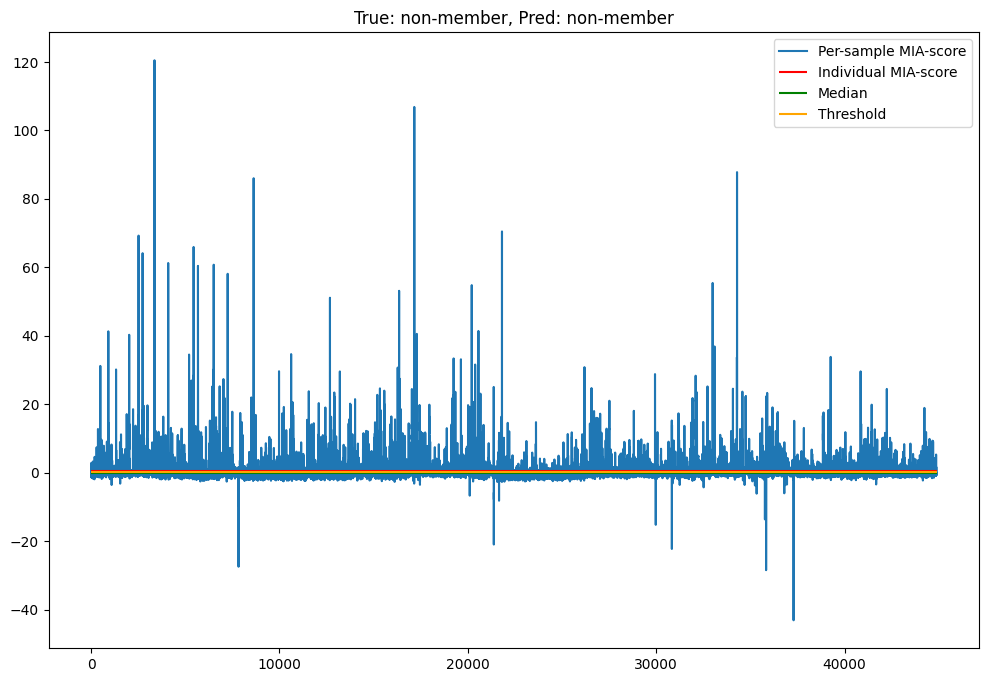

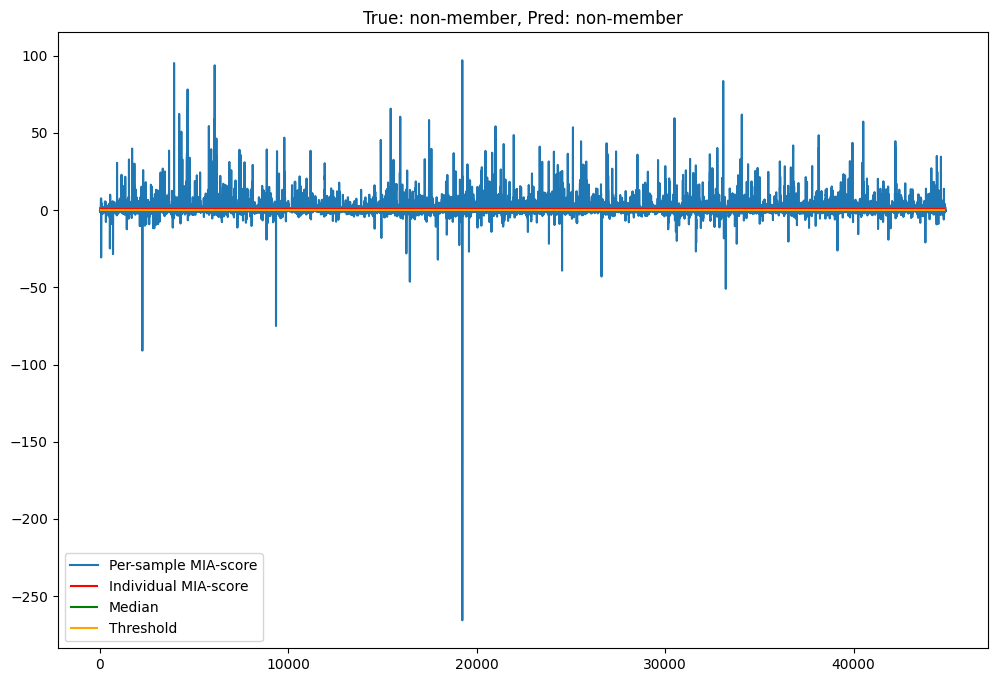

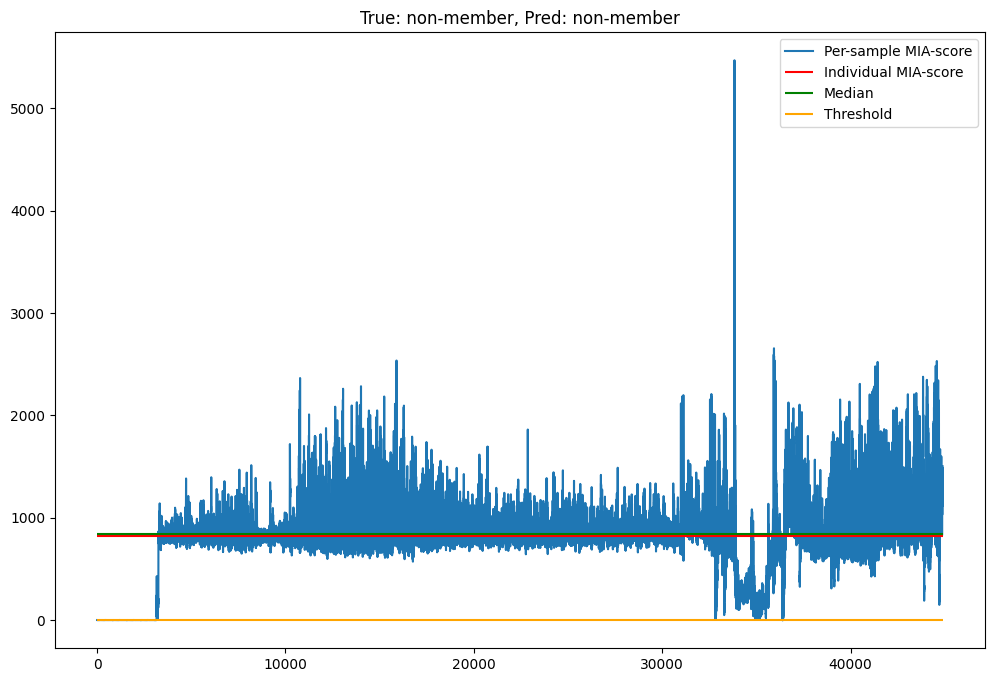

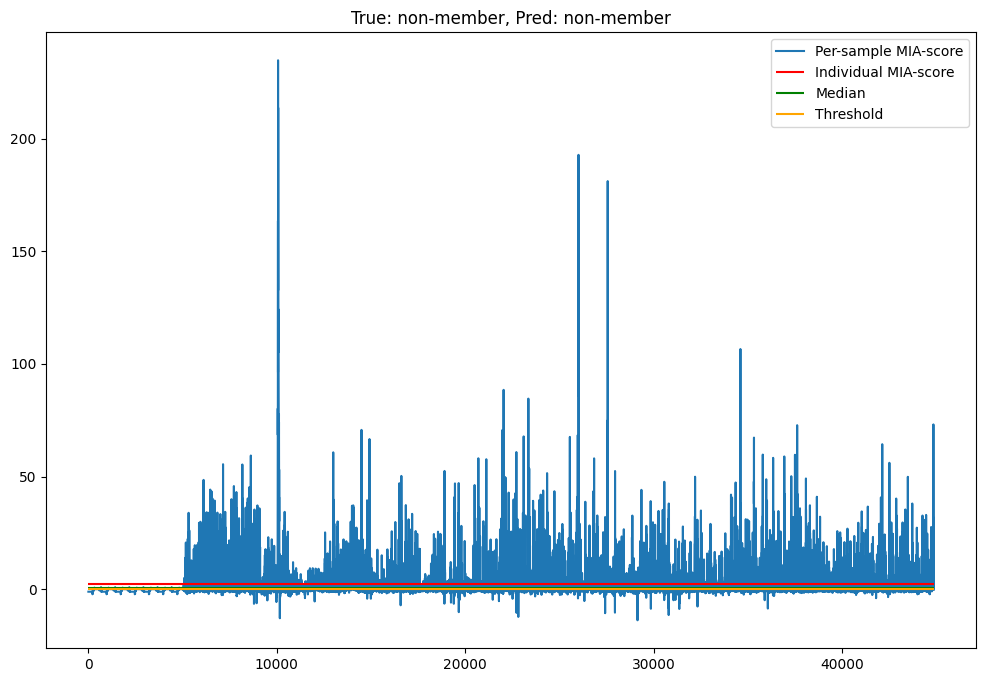

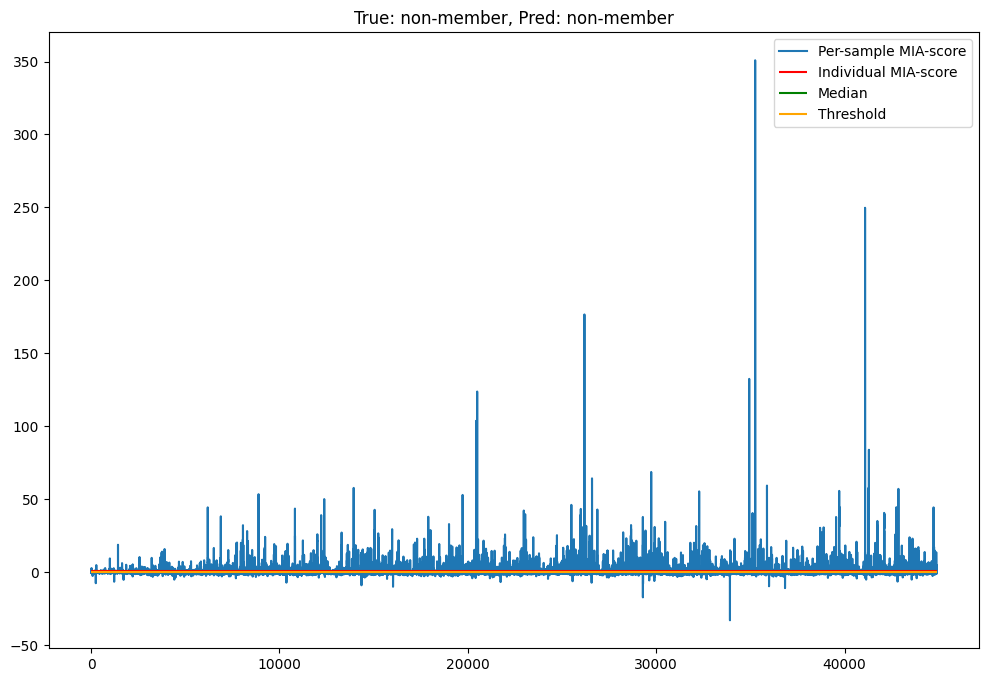

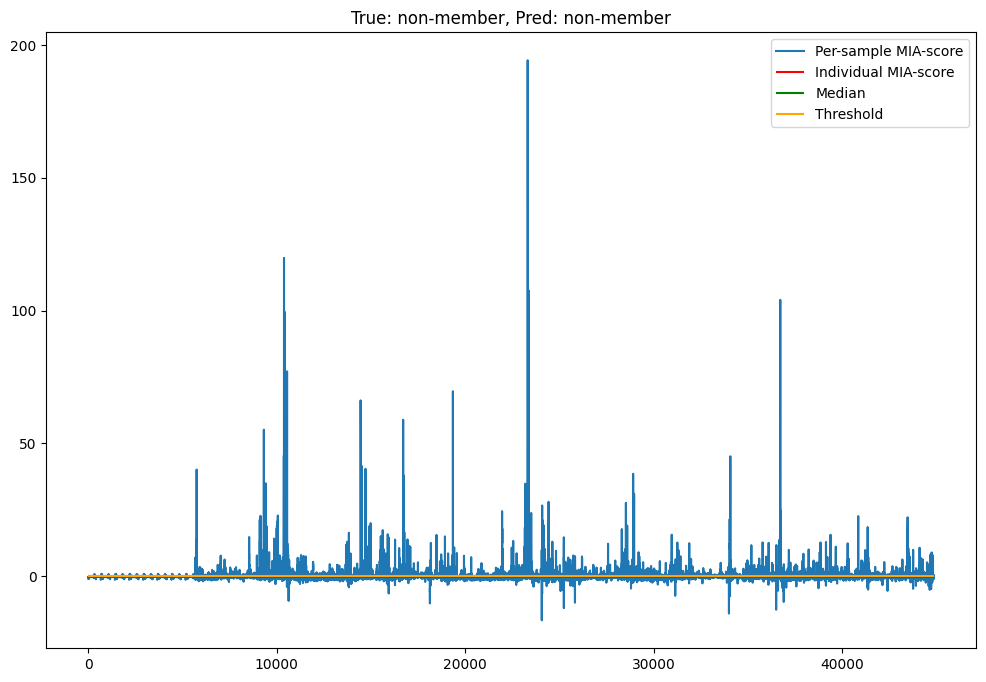

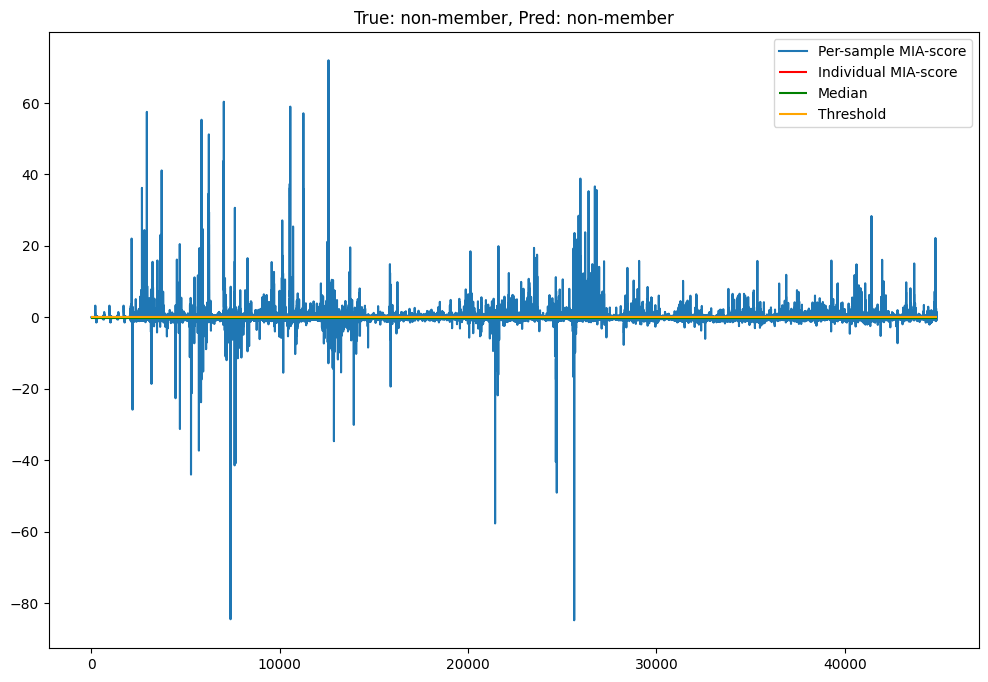

In [ ]:
for i in range(individuals):
    s = signals[i*samples_per_individual : (i+1)*samples_per_individual]
    plt.figure(figsize=(12, 8))
    plt.plot(s, label="Per-sample MIA-score")
    plt.hlines(indiv_signals[i], 0, samples_per_individual, color="red", label="Individual MIA-score")
    plt.hlines(indiv_median[i], 0, samples_per_individual, color="green", label="Median")
    plt.hlines(korv, 0, samples_per_individual, color="orange", label="Threshold")
    bajs = {0: "non-member", 1: "member"}
    plt.title(f"True: {bajs[indiv_labels[i]]}, Pred: {bajs[indiv_pred[i]]}")
    #plt.yscale("symlog")
    plt.legend()
    plt.show()

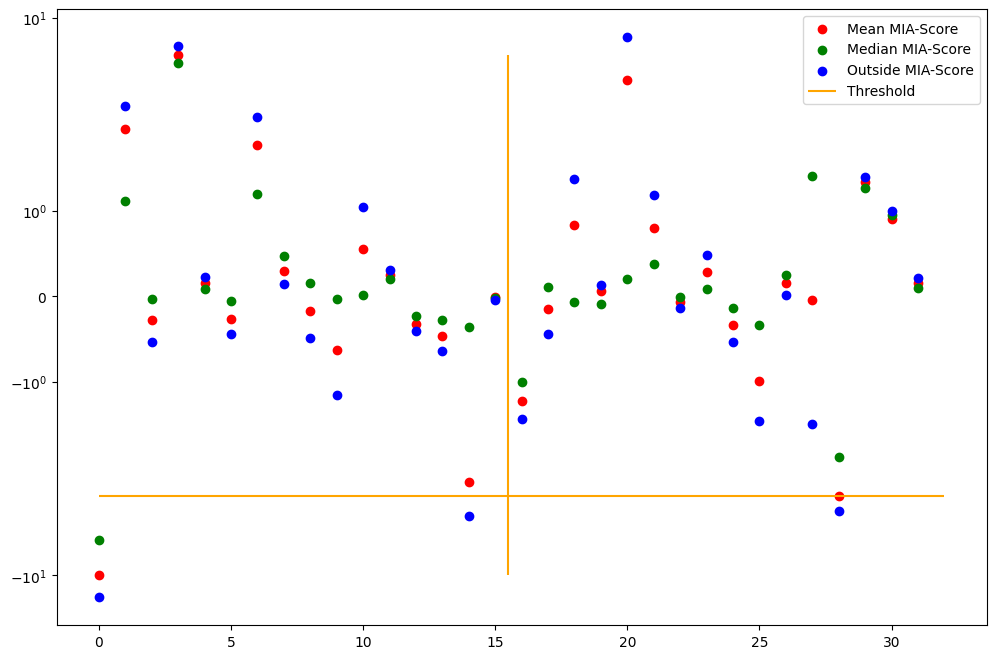

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(range(individuals), indiv_mean, color="red", label="Mean MIA-Score")
plt.scatter(range(individuals), indiv_median, color="green", label="Median MIA-Score")
plt.scatter(range(individuals), indiv_outside, color="blue", label="Outside MIA-Score")
plt.hlines(korv, 0, individuals, color="orange", label="Threshold")
plt.vlines(15.5, min(indiv_mean), max(indiv_mean), color="orange")
plt.yscale("symlog")
plt.legend()
plt.show()